# Flights data exploration
## by Jean-Luc COSSI

## Preliminary Wrangling

> I use Python visualization libraries to systematically explore "Reporting Carrier On-Time Performance" for several years. Those data files have been selected from http://stat-computing.org/dataexpo/2009/the-data.html.  
A detailed presentation of the data is available here https://www.transtats.bts.gov/Fields.asp?Table_ID=236

In [236]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime, time

%matplotlib inline

As the original files were too big, I created a random sample of the original files I chose to use.

> Load in the dataset and describe its properties. We motivate our exploration goals through this section.

In [237]:
# load data files
df_1987 = pd.read_csv('data/1988_sample.csv')
df_1989 = pd.read_csv('data/1989_sample.csv')
df_1990 = pd.read_csv('data/1990_sample.csv')
df_1991 = pd.read_csv('data/1991_sample.csv')
df_1992 = pd.read_csv('data/1992_sample.csv')

In [238]:
# concat all into one dafaframe
df = pd.concat([df_1987, df_1989, df_1990, df_1991, df_1992], ignore_index=True)

In [239]:
# Get the dataframe size
df.shape

(75000, 29)

In [240]:
# Get a view on some values
df.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
56372,1991,11,3,7,1234.0,1235,1328.0,1334,US,1059,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
68084,1992,3,16,1,1648.0,1650,1714.0,1719,CO,831,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
36241,1990,8,8,3,651.0,654,628.0,635,DL,383,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
43152,1990,1,1,1,1209.0,1210,1356.0,1350,DL,820,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
45995,1991,10,6,7,553.0,558,637.0,640,TW,591,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Observation: there are missing data in some columns.

In [241]:
# Get the columns types
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode     float64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [242]:
# Where are the missing data ?
df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                833
CRSDepTime               0
ArrTime               1015
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum              75000
ActualElapsedTime     1015
CRSElapsedTime           0
AirTime              75000
ArrDelay              1015
DepDelay               833
Origin                   0
Dest                     0
Distance               443
TaxiIn               75000
TaxiOut              75000
Cancelled                0
CancellationCode     75000
Diverted                 0
CarrierDelay         75000
WeatherDelay         75000
NASDelay             75000
SecurityDelay        75000
LateAircraftDelay    75000
dtype: int64

In [243]:
# Make a copy of the original dataframe
df_flights = df.copy()

In [244]:
# Drop the columns where all elements are missing
df_flights.drop('TailNum', axis=1, inplace=True)
df_flights.drop('AirTime', axis=1, inplace=True)
df_flights.drop('TaxiIn', axis=1, inplace=True)
df_flights.drop('TaxiOut', axis=1, inplace=True)
df_flights.drop('CancellationCode', axis=1, inplace=True)
df_flights.drop('CarrierDelay', axis=1, inplace=True)
df_flights.drop('WeatherDelay', axis=1, inplace=True)
df_flights.drop('NASDelay', axis=1, inplace=True)
df_flights.drop('SecurityDelay', axis=1, inplace=True)
df_flights.drop('LateAircraftDelay', axis=1, inplace=True)

In [245]:
# Where are the missing data ?
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime               833
CRSDepTime              0
ArrTime              1015
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
ActualElapsedTime    1015
CRSElapsedTime          0
ArrDelay             1015
DepDelay              833
Origin                  0
Dest                    0
Distance              443
Cancelled               0
Diverted                0
dtype: int64

In [246]:
# Now we delete the rows where at least one element is missing
#df_flights.dropna(inplace=True)

In [247]:
df_flights.shape

(75000, 19)

In [248]:
# Check the result
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime               833
CRSDepTime              0
ArrTime              1015
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
ActualElapsedTime    1015
CRSElapsedTime          0
ArrDelay             1015
DepDelay              833
Origin                  0
Dest                    0
Distance              443
Cancelled               0
Diverted                0
dtype: int64

In [249]:
# Get a view on the dataset
df_flights.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted
71460,1992,8,19,3,1102.0,1100,1159.0,1156,AA,333,177.0,176,3.0,2.0,DFW,LAX,1235.0,0,0
57779,1991,2,15,5,2055.0,2055,2332.0,2328,TW,54,97.0,93,4.0,0.0,STL,CLE,487.0,0,0
62637,1992,2,3,1,1456.0,1500,1620.0,1622,UA,937,84.0,82,-2.0,-4.0,LAX,SFO,337.0,0,0
34875,1990,10,25,4,1340.0,1340,1531.0,1531,EA,767,111.0,111,0.0,0.0,DTW,ATL,594.0,0,0
69198,1992,12,27,7,1651.0,1650,1908.0,1905,DL,694,77.0,75,3.0,1.0,LAS,SLC,368.0,0,0


### What is the structure of your dataset?

> There are 73546 records of flights, over 5 years. There are time variables (mainly expected times and delays), numeric variables and text variables such are origins, destinations and carriers' names. We also have boolean like information (here as 0 or 1) to know if the flight is canceled or diverted.


### What is/are the main feature(s) of interest in your dataset?

> I am most interested in the following :
1. Are there certain destinations or arrival cities that are home to more delays or cancellations ?
2. What are the preferred times for flights to occur ? Are there any changes over the years ?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> For my first feature of interest, looking into `Cancelled` which indicates if the flight has been canceled or not, will be a key. The reason of the cancellation identified as `cancellationCode` might be interesting to have more insights.   
Regarding Delaying, I think that arrival delays (`ArrDelay`) will help to support my investigation.  
Later, I will dive into cancelation and arrival delays relationships with the arrival cities or destinations here identified as `Dest`.    
> For the second one, "What are the preferred times for flights to occur ?" : I will focus on departure and arrival time here `DepTime`and `ArrTime`. Then, I will develop an understanding on any changes over the years `Year`.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Looking at the `Canceled` variable. 

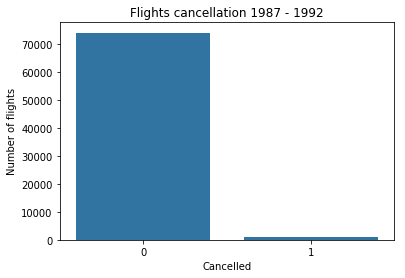

In [252]:
# Create a bar chart of the cancelation state

# Use only one color
base_color = sb.color_palette()[0]

# plot the bar chart
cancelled_bar = sb.countplot(data = df_flights, x = 'Cancelled', color = base_color)

# Set labels names
cancelled_bar.set(title='Flights cancellation 1987 - 1992', xlabel='Cancelled', ylabel='Number of flights');

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!